<a href="https://colab.research.google.com/github/ElioRame/ProgrammingAssignment2/blob/master/FinalAssignmentPALS0039_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# All seven books are used for the assignments, they are downloaded using read.lines() from library and renamed, they are then added to create a new string named 'data'
with open("/content/pg74.txt") as TomSawyer:
  Book1 = TomSawyer.readlines()
with open("/content/pg84.txt") as Frankenstein:
  Book2 = Frankenstein.readlines()
with open("/content/pg345.txt") as Dracula:
  Book3 = Dracula.readlines()
with open("/content/pg1342.txt") as PrideandPrejudice:
  Book4 = PrideandPrejudice.readlines()
with open("/content/pg1727.txt") as Odissey:
  Book5 = Odissey.readlines()
with open("/content/pg2701.txt") as MobyDick:
  Book6 = MobyDick.readlines()
with open("/content/pg3207.txt") as Leviathan:
  Book7 = Leviathan.readlines()

data = Book1 + Book2 + Book3 + Book4 + Book5 + Book6 + Book7
print(data[:50])

['\ufeffThe Project Gutenberg eBook of The Adventures of Tom Sawyer, Complete\n', '    \n', 'This ebook is for the use of anyone anywhere in the United States and\n', 'most other parts of the world at no cost and with almost no restrictions\n', 'whatsoever. You may copy it, give it away or re-use it under the terms\n', 'of the Project Gutenberg License included with this ebook or online\n', 'at www.gutenberg.org. If you are not located in the United States,\n', 'you will have to check the laws of the country where you are located\n', 'before using this eBook.\n', '\n', 'Title: The Adventures of Tom Sawyer, Complete\n', '\n', 'Author: Mark Twain\n', '\n', 'Release date: July 1, 2004 [eBook #74]\n', '                Most recently updated: August 9, 2023\n', '\n', 'Language: English\n', '\n', 'Credits: David Widger\n', '\n', '\n', '*** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER, COMPLETE ***\n', '\n', '\n', '\n', '\n', 'THE ADVENTURES OF TOM SAWYER\n', '\n', '\n', '

In [2]:
!pip install -U nltk>=3.7.0

import nltk


nltk.download("punkt")
nltk.download('punkt_tab')

from nltk.lm import Vocabulary
from nltk.util import pad_sequence, ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.lm.preprocessing import flatten


import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import regex as re

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Embedding, Flatten, LSTM, TimeDistributed, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [74]:
import string
import collections
import operator
import unicodedata


# Eliminate non-English characters and punctuation by first defining a function that identifies using booleans
# whether the items in the string are alphabetical and part of the list of items in the unicodedata function
# Unicode gives access to list of characters through specifications (in this case 'LATIN' and 'COMMON')
# Therefore it identifies as True items that are part of the latin alphabet
def is_english_letter(letters):
  return str(letters).isalpha() and unicodedata.name(letters).startswith(('LATIN', 'COMMON'))

# Check if data contains only letters that are part of the Latin alphabet
tokenizer = RegexpTokenizer(r'[A-Za-z]\w+')

for text in data:
 token_text = tokenizer.tokenize(text)
print(is_english_letter(token_text))

# There are characters belonging to different alphabets
# Process the dataset to eliminate unwanted characters
# if the item is part of the latin alphabet it is added to a new list (output_list)
def remove_non_english_letters(list_of_letters):
    output_list = []
    for letter in list_of_letters:
        filtered = filter(is_english_letter, list(letter))
        english_string = ''.join(filtered)
        output_list.append(english_string)
    return output_list

# Creat a list to append the padded and processed text
letters = []
# Texts are split into sentences using the newline (/n) symbol
for text in data:
  #split_text = re.split(r"\n", text)
  strip_text = text.strip()
  split_text = strip_text.splitlines()
  for sentence in split_text:
   # The following code creates a new list. All letters in the text are first made lowercase and then appended
     lower_text = [letter.lower() for letter in sentence]
   # All letters that don't belong to the English alphabet are removed
     eng_text = remove_non_english_letters(lower_text)
   # The corpus is padded at the sentence level by using <s> at the start, and </s> at the end, of every sentence
     padded_corpus = list(pad_sequence(eng_text, n=2, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>"))
   # The padded corpus is appended to the list "letters"
     letters.append(padded_corpus)


#for word in padded_words:
   #tokenizer = RegexpTokenizer(r'\w+')
   #tokenised_word = tokenizer.tokenize(words)
    #eng_letters = remove_non_english_letters(words)
    #for word in eng_letters:
     #for letter in word:
      #letters.append(letter)

#padded_corpus = list(pad_sequence(letters, n=2, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>"))
#for word in padded_words:
  #if word in padded_words == "<s>" or "</s>":
    #letters.append(word)
  #else:
    #for letter in words:
      #letters.append(letter)



   #for punct in string.punctuation:
    #letters = list(map(lambda x: " " if x == punct else x, tokenised_word))
     #for punct in string.punctuation:
      #text_punct = list(map(lambda x: " " if x == punct else x, letter))
      #letters.append(letter)



#def tokenize(text):
  #text_lower = [word.lower() for word in str(text)]
  #for punct in string.punctuation:
    #text_punct = list(map(lambda x: " " if x == punct else x, text_lower))
  #return text_punct

#tokenized_data = tokenize(data)
#for words in tokenized_data:
  #for letter in words:
    #letters.append(letter)









# The corpus is flattened to create a single list with all padded sentences
corpus = list(flatten(letters))



# A vocabulary is created using nltk.vocab which gives us a list of all the letters that appear in the text for 50 times or more
vocab = Vocabulary(corpus, unk_cutoff=50)

# Data from the corpus is partitioned into train and test sets
test_letters = corpus[:100000]
train_letters = corpus[100000:]

# Inspection shows the presence of 31 vocab words, consistent with the English alphabet with added '<UNK>' and padding, as well as empty spaces between words
print("Length of corpus:", len(corpus))
print("Length of vocabulary:", len(vocab))
print("Unique words in corpus:", len(set(corpus)))

show_vocab = [i for i in vocab]
print(show_vocab)


print(corpus[:100])
print(split_text[:100])



79.0


In [76]:
#Create a dictionary that maps letters to their indexes within the vocab. We iterate though the words in our vocabulary and assign an index to each one
#The index then becomes the key value to our letter
letter_to_index = {l: i for i, l in enumerate(vocab)}
# i.e. if vocab = abcdefg
# word_to_index = {a : 1, b : 2, c : 3, d : 4, e : 5, f : 6, g : 6}
# The function maps data to index in the vocab so that the word 'cab' = [3, 1, 2]


# We iterate through all the letters in the training and test sets and convert each letter to the index using the letter_to_index dictionary and the lookup function
# which will return the correct index for each letter
train_indices = [letter_to_index[vocab.lookup(l)] for l in train_letters]
test_indices = [letter_to_index[vocab.lookup(l)] for l in test_letters]

# A list of indexes can then be fed to the neural network
print(train_indices[:600])
print(test_indices[:25])




[9, 14, 1, 16, 12, 17, 1, 5, 23, 4, 16, 17, 4, 17, 1, 24, 0, 1, 12, 7, 21, 1, 1, 13, 4, 9, 14, 22, 1, 1, 25, 2, 1, 19, 1, 16, 23, 23, 1, 17, 7, 12, 4, 1, 16, 23, 23, 1, 7, 18, 4, 6, 1, 13, 11, 2, 1, 2, 3, 4, 1, 14, 25, 19, 19, 1, 1, 17, 7, 12, 1, 2, 1, 22, 7, 11, 1, 13, 4, 1, 16, 15, 6, 16, 25, 17, 24, 0, 7, 15, 1, 2, 3, 16, 2, 1, 25, 2, 1, 16, 25, 12, 1, 2, 1, 16, 12, 22, 2, 3, 25, 12, 10, 1, 16, 2, 1, 16, 23, 23, 1, 1, 5, 23, 4, 16, 19, 4, 1, 1, 13, 4, 9, 14, 22, 1, 1, 1, 16, 12, 17, 1, 3, 4, 1, 2, 11, 10, 10, 4, 17, 1, 16, 2, 1, 3, 4, 6, 24, 0, 16, 5, 6, 7, 12, 1, 16, 12, 17, 1, 2, 3, 4, 1, 3, 16, 12, 17, 19, 1, 24, 0, 13, 22, 1, 16, 12, 17, 1, 13, 22, 1, 19, 3, 4, 1, 10, 16, 18, 4, 1, 11, 5, 1, 1, 16, 12, 17, 1, 23, 4, 2, 1, 3, 4, 6, 1, 3, 16, 12, 17, 19, 1, 17, 6, 7, 5, 1, 1, 3, 4, 6, 1, 15, 16, 9, 4, 1, 1, 16, 23, 23, 1, 10, 23, 7, 21, 25, 12, 10, 24, 0, 21, 25, 2, 3, 1, 2, 3, 4, 1, 19, 2, 6, 11, 10, 10, 23, 4, 1, 1, 9, 16, 20, 4, 1, 11, 5, 1, 16, 12, 17, 1, 19, 11, 13, 20, 25, 2

In [77]:
# Choose sequence length
seqlen = 80

# we create a function which takes the input, an index value, and the sequence length as arguments
# We create sequences of same length by using the modulo (%) which divides our input into 500 letter sequences while the remainder is discarded
def prepare_sequences(letters, unk_index, seqlen=seqlen):
  # We calculate the remainder of our corpus length divided by the chosen sequence length
  trunc_length = len(letters) % seqlen
  # We create a two dimentional array of shape (, 100) by taking away the trunc_length remainder from the start of the corpus
  X = np.array(letters)[trunc_length:].reshape((-1, seqlen))
  # Similarly, a (, 100) dimensional array is created for the corpus with the added unk_index by taking away the remainder from the start of the corpus
  # The output is a shifted by 1, with unk_index representing the next letter to predict.
  y = np.array(letters + [unk_index])[trunc_length + 1:].reshape((-1, seqlen))
  return X, y

# The unk_index is set to the vocabulary index for "<UNK>"
Xtrain, ytrain = prepare_sequences(train_indices, letter_to_index["<UNK>"])
Xtest, ytest = prepare_sequences(test_indices, letter_to_index["<UNK>"])


print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

print(Xtrain[:10])


(69899, 80) (69899, 80)
(1250, 80) (1250, 80)
[[ 1  2  3  4  1 14 25 19 19  1  1 17  7 12  1  2  1 22  7 11  1 13  4  1
  16 15  6 16 25 17 24  0  7 15  1  2  3 16  2  1 25  2  1 16 25 12  1  2
   1 16 12 22  2  3 25 12 10  1 16  2  1 16 23 23  1  1  5 23  4 16 19  4
   1  1 13  4  9 14 22  1]
 [ 1  1 16 12 17  1  3  4  1  2 11 10 10  4 17  1 16  2  1  3  4  6 24  0
  16  5  6  7 12  1 16 12 17  1  2  3  4  1  3 16 12 17 19  1 24  0 13 22
   1 16 12 17  1 13 22  1 19  3  4  1 10 16 18  4  1 11  5  1  1 16 12 17
   1 23  4  2  1  3  4  6]
 [ 1  3 16 12 17 19  1 17  6  7  5  1  1  3  4  6  1 15 16  9  4  1  1 16
  23 23  1 10 23  7 21 25 12 10 24  0 21 25  2  3  1  2  3  4  1 19  2  6
  11 10 10 23  4  1  1  9 16 20  4  1 11  5  1 16 12 17  1 19 11 13 20 25
   2  2  4 17  1  1  2  7]
 [20  1 14 25 19 19  4 17  1  2  3  4  1  6  4 17  1 23 25  5 19  1 16 12
  17 24  0 19 16 25 17  1 24  0  1 12  7 21  1 25  2  1 19  1 16 23 23  1
  17  7 12  4  1  1 13  4  9 14 22  1  1 16 12 17  1 16 23 

In [79]:
# This function calculates the perplexity by taking the product of all predicted probabilities, take the geometric mean, and the inverse
def perplexity(y_true, y_pred):
  cross_entropy = tf.losses.sparse_categorical_crossentropy(y_true, y_pred)
  perplexity = tf.exp(tf.reduce_mean(cross_entropy))
  return perplexity

#A sequential model is built with vocab length as input and output width, 250 as input length, and low learning rate
def build_model(input_width=len(vocab), input_length=seqlen, output_width=len(vocab), learning_rate=0.01):
 model = Sequential()

  # the Embedding layer transforms each input into a unique vector of length output_dim, its aim is dimensionality reduction
  # Through the unique vectors the model learns relationships between the inputs
  #The current model has used different output dimensions (25, 64, 128)
  #Using longer vectors has lead to less perplexity, repectively ...
 model.add(Embedding(input_dim=input_width, output_dim=128, input_length=input_length))

  #The following LSTM models
 model.add(LSTM(30, return_sequences=True, activation='tanh'))
 model.add(Dropout(0.2))
 model.add(LSTM(30, return_sequences=True, activation='tanh'))
 model.add(TimeDistributed(Dense(input_width, activation='softmax')));
 model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=[perplexity])
 return model

LSTMmodel = build_model()

#model.build(input_shape=(94, 100))
#Inspect

#print(model.summary())

In [84]:
# model.fit is used on the training data.
# Ten percent of the training data is used for validation - the remaining amount is plit into 216 batches of 94 sequences each, which are trained for 100 epochs.
# EarlyStopping is part of the tensorflow package, it will monitor a specific value (in this case, 'val_loss'), and it will stop if there has been no meaningful change for five epochs
# This helps to avoid overfitting
training_model = LSTMmodel.fit(Xtrain,ytrain, batch_size=70, validation_split=0.10, epochs=200, callbacks=EarlyStopping(monitor="val_loss", patience=20))

Epoch 1/200
899/899 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - loss: 1.7369 - perplexity: 5.6811 - val_loss: 1.6328 - val_perplexity: 5.1217
Epoch 2/200
899/899 ━━━━━━━━━━━━━━━━━━━━ 141s 122ms/step - loss: 1.7357 - perplexity: 5.6744 - val_loss: 1.6398 - val_perplexity: 5.1575
Epoch 3/200
899/899 ━━━━━━━━━━━━━━━━━━━━ 141s 122ms/step - loss: 1.7355 - perplexity: 5.6733 - val_loss: 1.6398 - val_perplexity: 5.1577
Epoch 4/200
899/899 ━━━━━━━━━━━━━━━━━━━━ 143s 123ms/step - loss: 1.7345 - perplexity: 5.6675 - val_loss: 1.6374 - val_perplexity: 5.1456
Epoch 5/200
899/899 ━━━━━━━━━━━━━━━━━━━━ 142s 123ms/step - loss: 1.7357 - perplexity: 5.6744 - val_loss: 1.6421 - val_perplexity: 5.1695
Epoch 6/200
899/899 ━━━━━━━━━━━━━━━━━━━━ 143s 124ms/step - loss: 1.7379 - perplexity: 5.6864 - val_loss: 1.6424 - val_perplexity: 5.1712
Epoch 7/200
899/899 ━━━━━━━━━━━━━━━━━━━━ 112s 125ms/step - loss: 1.7370 - perplexity: 5.6818 - val_loss: 1.6360 - val_perplexity: 5.1379
Epoch 8/200
899/899 ━━━━━━━━━━━━━━━━━━━━ 

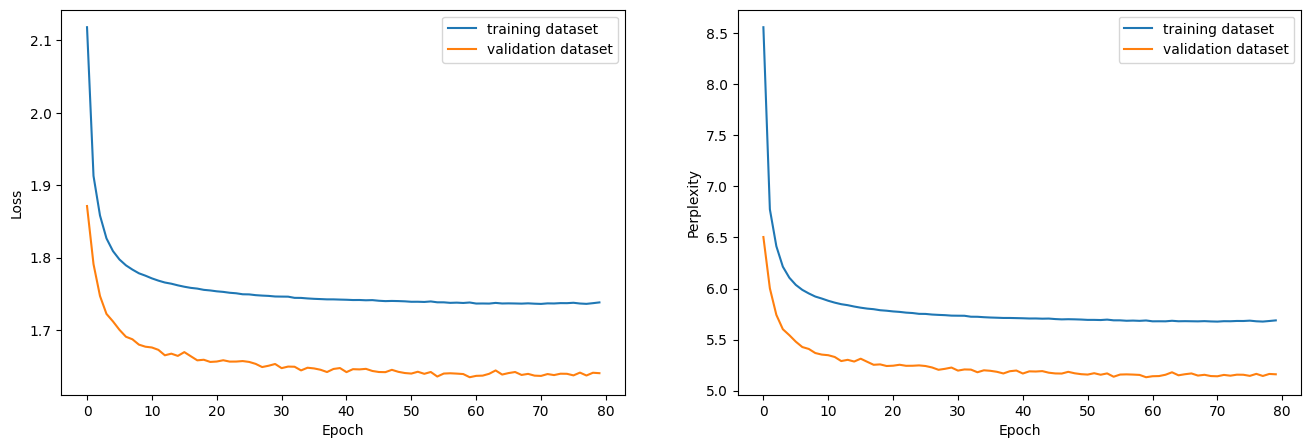

In [81]:
# Make two graphs, plotting respectively the Loss and Perplexity values

def plot_training_history(training_model):
  # Choose the number of plots, how they should appear (side to side), and the size of the final figure
  fig, axs = plt.subplots(1, 2, figsize=(16, 5))
  # Plot 1: Loss - plot a line graph for both the training and validation set values throughout the different epochs ('loss' and 'val_loss') in training_info
  axs[0].plot(training_model.history['loss'], label="training dataset")
  axs[0].plot(training_model.history['val_loss'], label="validation dataset")
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("Loss")
  axs[0].legend()
  # Plot 2: Perplexity - plot a line graph for both the training and validation set values throughout the different epochs
  axs[1].plot(training_model.history['perplexity'], label="training dataset")
  axs[1].plot(training_model.history['val_perplexity'], label="validation dataset")
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("Perplexity")
  axs[1].legend()

  plt.show()

plot_training_history(training_model)

In [82]:
# Calculate loss and perplexity. Both results are ..., indicating that ...
# 5.87 test perplexity and 1.77 test loss for Embedding, output_dim = 28), EarlyStopping stopped at epoch 38
test_loss, test_perplexity = model.evaluate(Xtest, ytest, verbose=0)
print("Test loss:", test_loss)
print("Test perplexity:", test_perplexity)

Test loss: 2.884222984313965
Test perplexity: 17.902175903320312


In [83]:

#Map indexes stored through word_to_index() back to their original form
index_to_letter = {i: l for l, i in letter_to_index.items()}

# Choose seed text
seed_text = "<s> Merry christ"
# Choose how many characters you want the model to predict
next_letters = 3
#Create a list to add the tokenised and padded seed_text
sequence = []

#Lower, tokenise, and remove punctuation from seed_text
for text in seed_text:
  lower_t = [word.lower() for word in seed_text]
  for words in lower_t:
   tokenizer = RegexpTokenizer(r'\w+')
   token_word = tokenizer.tokenize(words)
   for word in token_word:
    for letter in word:
      sequence.append(letter_to_index[letter])

# Pad the sequence
padded_seq = pad_sequences([sequence], maxlen = len(sequence), padding = "post")

# Use model.predict to estimate how likely it is for each letter in the vocabulary to come after the seed_text
for i in range(next_letters):
  full_prediction = model.predict(padded_seq, verbose=0)
  next_three_letters = full_prediction[0][len(padded_seq) + i]
  # Use np.argmax to obtain the letter with the highest probability amongst the vocabulary items
  prediction = index_to_letter[np.argmax(next_three_letters)]
  # Add each prediction to the seed_text
  seed_text += prediction


# Print sequence
print("Next_three_letters:", seed_text)

Next_three_letters: <s> Merry christ


1.	Data pre-processing

The present notebook makes use of all the seven texts made available for this assignment; namely: "The Adventures of Tom Sawyer" (Book 1), "Frankenstein" (Book 2), "Dracula" (Book 3), "Pride and Prejudice"(Book 4), "The Odyssey" (Book 5), "Moby Dick" (Book 6), and "Leviathan" (Book 7). The pre-processing of the data was facilitated by the use of several NLTK classes, such as the nltk.lm.Vocabulary and flatten functions, the nltk.util.pad_sequence utility function, and the nltk.tokenize.RegexpTokenizer function.
Upon inspection of the dataset, it became clear that the corpus contained letters belonging to non-Latin alphabets. Given the nature of the assignment - which required to build a language model able to predict the next three letters in a given English seed text - the data was pre-processed to include only letters that are part of the Latin alphabet by creating a new list which only comprised tokens present in the unicodedata dataset under the “LATIN” and “COMMON” lemma. The text was first tokenised at the sentence level, with punctuation, spaces, and newlines being eliminated and substituted by empty strings.
The sequence was padded to obtain sequences of similar length. A single flattened list was then created with each letter from the corpus forming a separate item.  Using the nltk.lm.Vocabulary class with a cut-off parameter of 50, a list containing every letter present more than 50 times throughout the corpus. Analysis of the final dataset revealed a total length of 5737483 letters; a vocabulary set of 31 letters, which, upon inspection, included all letters of the English alphabet, as well as both designed chosen padding symbols (“< s>” and “< /s>”), and the empty string; while the total length of unique letters in the text was found to be 43, containing lesser used Latin alphabet letters, such as  .
Finally, the list was separated into a training set, which comprised all the letters in the corpus apart of the first 100000, which were selected to be used for the test set. An index was then created to obtain a numerical equivalent of the items in the list based on their position in the vocabulary. After indexing the train and test sets, the data was reshaped into an array by partitioning each set into arrays of shape (, 100) using the modulo - this will consi: the training set, of dimension (22549, 250), and the test set, of dimension (400, 250). The training set will be further partitioned by using 10% for the validation set during training.

2.	Recurrent neural network model

A recurrent neural network model was created with the following characteristics:

a.	Embedding layer
The Embedding layer transforms each one-hot encoded input into a unique vector, which then is used by the language model to keep track of the relationships between the tokens. The high-dimensional data is compressed, and the processing of dense vectors can make the model faster and more efficient. The letters that appear in similar context will have similar embeddings.
The present model has been trained with vectors of different lengths - an input dimension of 28 yielded relatively high perplexity (5.87) and loss (1.76) values, while higher vector dimensions of length 64 (Perplexity = , Loss = ) and 128 (Perplexity = , Loss = ) showed significantly lower results. This may be due to …
b.	 Long Short-Term Model
After coverting our tokens to meaningful representations, two LSTM layers of shape ... were used to learn
c.	Long Short Term Model with dropout
d.	Dense layer using the softmax activation function. The embedding layer
7.2 work heavily with nltk we use several nltk classes such as vocabulary and utility functions such as pad_sequences neural networks are taken from tensorflow, adam the optimizer, time distributed is a layer that connects structure from a feedforward network to the lstm
padding to be able to distinguish between sentences create a vocabulary giving cutoff as a parameters


